In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(faux)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

************
Welcome to faux. For support and examples visit:
https://debruine.github.io/faux/
- Get and set global package options with: faux_options()
************


Attaching package: ‘faux’


The following object is masked from ‘package:purrr’:

    %||%




# STAT 301 - Group Project - Proposal

**Submitted by Group 6:**
- Rohan Joseph
- Alan Lee
- Buyan Wang
- Yifan Wu

In [2]:
# Load the necessary packages for the Project Proposal
library(dplyr)
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(faux)
library(GGally)
#library(corrplot)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## 1. Introduction

[TO BE ADDED]

The dataset can be found at: https://www.qogdata.pol.gu.se/data/codebook_std_jan22.pdf

## 2. Explanatory Analysis and Preliminary Results 

### Importing and Cleaning the Dataset

In [3]:
url <- "https://www.qogdata.pol.gu.se/data/qog_std_ts_jan22.csv"
QOG_dataset_original <- read_delim(url, ",")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 15168 Columns: 1913
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (7): cname, cname_qog, ccodealp, version, cname_year, ccodealp_year, ...
dbl (1903): ccode, year, ccode_qog, ccodecow, aid_cpnc, aid_cpsc, aid_crnc, ...
lgl    (3): psi_cpsi2, psi_edate2, psi_psi2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# For cleaning up the dataset we will be doing the following:
# - We will be filtering out the columns other than "cname", "year", "van_part", "van_comp", jw_bicameral", "br_pvote",
#   and "cpds_enpv".
# - We will be renaming our selected variables for better readability.
# - We will be filtering out the NA rows when applicable.

QOG_cleaned <- QOG_dataset_original %>% 
                select(cname, year, van_part, van_comp, jw_bicameral, br_pvote, cpds_enpv) %>%
                filter(cname != is.na(cname),
                       year != is.na(year),
                       van_part != is.na(van_part),
                       van_comp != is.na(van_comp),
                       # jw_bicameral != is.na(jw_bicameral),
                       cpds_enpv != is.na(cpds_enpv)) 

colnames(QOG_cleaned) <- c("country", "year", "voter_turnout", "elec_comp", "gov_type", "prop_rep", "num_party")

QOG_cleaned <- QOG_cleaned %>%
                mutate(gov_type = ifelse(is.na(gov_type), 0, gov_type)) %>%
                mutate(gov_type = ifelse(gov_type == 0, "unitary", "bicarmel")) %>%
                mutate(prop_rep = ifelse(prop_rep == 0, "no", "yes")) %>%
                filter(prop_rep != is.na(prop_rep))

# QOG_cleaned

### Summary Tables 

In [5]:
# Summary of Data by Country:
QOG_by_country <- QOG_cleaned %>% select(-year, -gov_type, -prop_rep) %>%
                    group_by(country) %>%
                    summarize(avg_voter_turnout = mean(voter_turnout),
                              avg_elec_comp = mean(elec_comp),
                              avg_num_party = mean(num_party))
QOG_by_country

country,avg_voter_turnout,avg_elec_comp,avg_num_party
<chr>,<dbl>,<dbl>,<dbl>
Australia,58.09051,57.47119,3.078265
Austria,61.09593,58.54407,3.167171
Belgium,60.26864,68.20339,7.853640
Bulgaria,53.35724,54.97000,4.442549
Canada,44.63186,58.11695,3.312809
Croatia,54.46421,51.51158,5.927319
Cyprus,46.20209,63.28744,3.681789
Czechia,53.00615,65.46923,5.817482
Denmark,62.96000,65.84237,5.091167


In [6]:
# Summary of Table by Year:
QOG_by_year <- QOG_cleaned %>% select(-country, -gov_type, -prop_rep) %>%
                    group_by(year) %>%
                    summarize(avg_voter_turnout = mean(voter_turnout),
                              avg_elec_comp = mean(elec_comp),
                              avg_num_party = mean(num_party))
QOG_by_year

year,avg_voter_turnout,avg_elec_comp,avg_num_party
<dbl>,<dbl>,<dbl>,<dbl>
1960,49.00476,55.02381,3.430046
1961,50.70476,55.45714,3.396060
1962,50.24762,55.15238,3.409360
1963,49.22381,55.96190,3.443733
1964,48.87143,55.35238,3.450720
1965,50.06667,56.45714,3.472749
1966,49.41818,56.42273,3.429037
1967,50.41429,57.54762,3.596606
1968,50.09048,58.02857,3.628386


In [7]:
# Summary of Data by Government Type:
QOG_by_gov_type <- QOG_cleaned %>% select(-country, -year, -prop_rep) %>%
                    group_by(gov_type) %>%
                    summarize(avg_voter_turnout = mean(voter_turnout),
                              avg_elec_comp = mean(elec_comp),
                              avg_num_party = mean(num_party))
QOG_by_gov_type

gov_type,avg_voter_turnout,avg_elec_comp,avg_num_party
<chr>,<dbl>,<dbl>,<dbl>
bicarmel,55.83911,59.77002,4.587733
unitary,53.25492,59.76764,4.305824


In [8]:
## Summary of Data by whether there is proportional representation or not:
QOG_by_prop_rep <- QOG_cleaned %>% select(-country, -year, -gov_type) %>%
                    group_by(prop_rep) %>%
                    summarize(avg_voter_turnout = mean(voter_turnout),
                              avg_elec_comp = mean(elec_comp),
                              avg_num_party = mean(num_party))
QOG_by_prop_rep

prop_rep,avg_voter_turnout,avg_elec_comp,avg_num_party
<chr>,<dbl>,<dbl>,<dbl>
no,50.66212,56.78629,3.561606
yes,55.01874,60.77583,4.654132


***[TO BE ADDED - Briefly explaining the summary tables]***

### Visualizations

***[For each categorical variables, we use a boxplot to show its relationship with response variable.]***

In [9]:
QOG_box <- QOG_cleaned %>% select(-country, -year, -prop_rep)

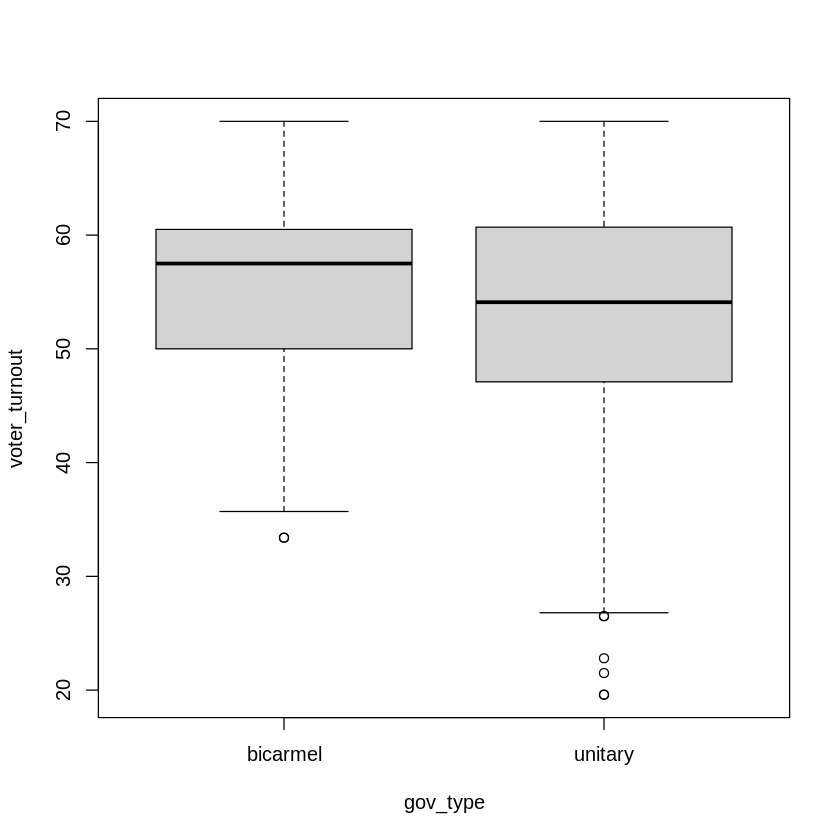

In [10]:
boxplot(voter_turnout ~ gov_type, data=QOG_cleaned, notch=FALSE)

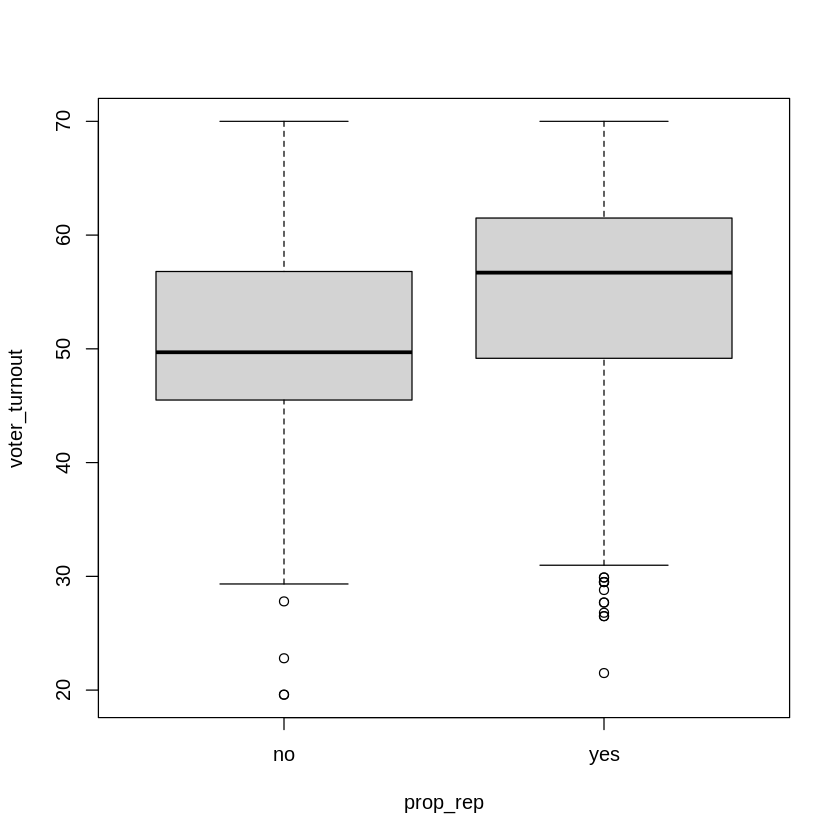

In [11]:
boxplot(voter_turnout ~ prop_rep, data=QOG_cleaned, notch=FALSE)

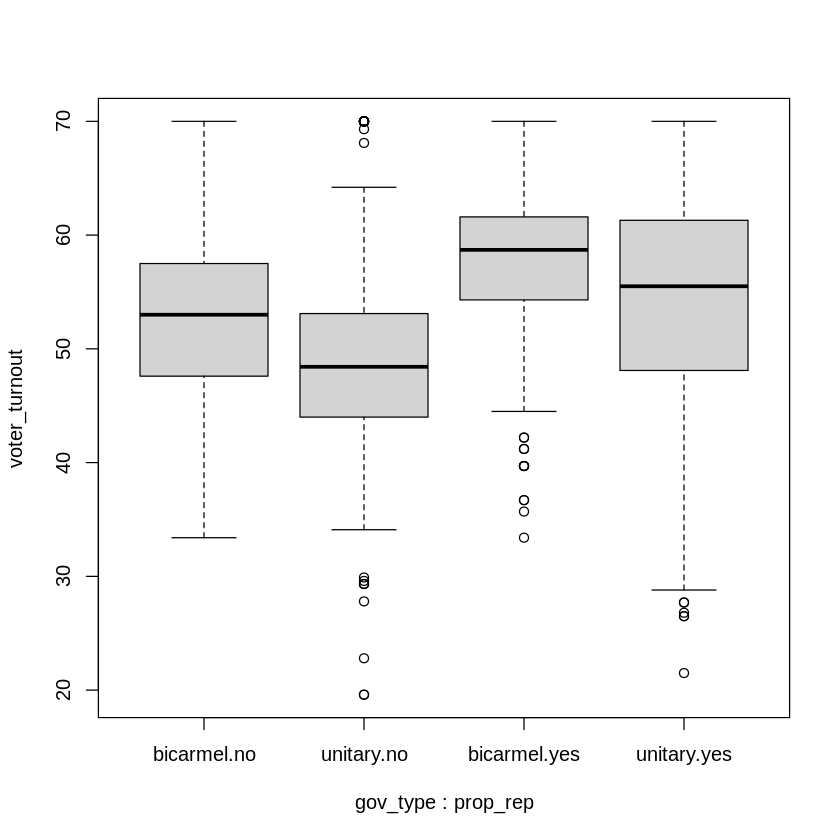

In [12]:
boxplot(voter_turnout ~ gov_type*prop_rep, data=QOG_cleaned, notch=FALSE)

***[For all the numerical variables, we use a correlation graph to show their correlation among themselves and with the response variable.]***

In [13]:
# QOG_numerical <- QOG_cleaned %>% select(-country, -year, -gov_type, -prop_rep)
# M = cor(QOG_numerical)
# #corrplot(M, method="color")
# corrplot.mixed(M, order = 'AOE')

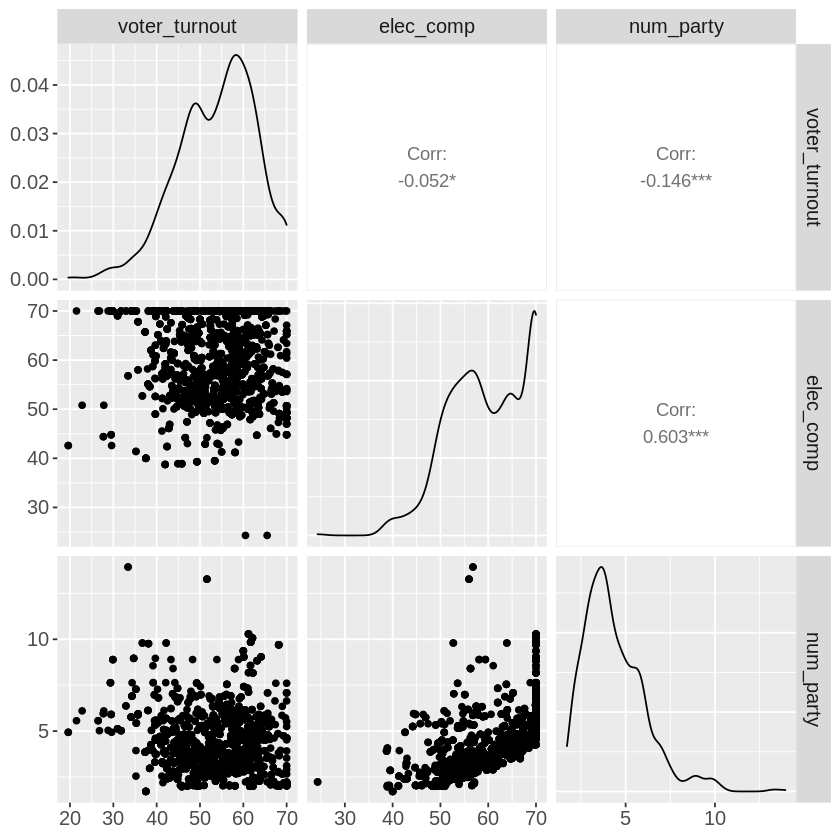

In [14]:
QOG_cleaned_pairplots <- QOG_cleaned %>%
    select(voter_turnout,elec_comp,num_party) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
QOG_cleaned_pairplots

***[TO BE ADDED - Explaining the correlation graph]***

## 3. Methodology

[TO BE ADDED]

NOTES:
- Building the linear regression model for each category.
- Explain the liner regression model.
- Build confidence intervals for each category and explain.

## 4. References

[TO BE ADDED]

## Introduction

## Priliminary Results

## Methods